In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_parquet('../data/01-07-2023/DATA_LABEL')
df

,CASA_HOLD,CARD_CREDIT_HOLD,EB_SACOMPAY_HOLD,EB_MBIB_HOLD,LOR,CREDIT_SCORE,CASA_BAL_SUM_NOW,CASA_DAY_SINCE_LAST_TXN_CT_36M,CARD_CREDIT_MAX_LIMIT,CARD_CREDIT_SUM_BAL_NOW,EB_SACOMPAY_DAY_SINCE_LTST_LOGIN,EB_SACOMPAY_DAY_SINCE_LTST_TXN,EB_MBIB_DAY_SINCE_ACTIVE,LIFE_STG,AREA,REACTIVATED
CUSTOMER_CDE,,,,,,,,,,,,,,,,
10358026,1.0,NaN,NaN,NaN,2283.0,NaN,NaN,1095,NaN,NaN,NaN,NaN,NaN,Bắt đầu sự nghiệp,VN0010006,0
7911128,NaN,NaN,NaN,NaN,2734.0,NaN,NaN,1095,NaN,NaN,NaN,NaN,NaN,Cuối sự nghiệp,VN0010006,0
88639,1.0,NaN,NaN,NaN,5033.0,NaN,190.0,1095,NaN,NaN,NaN,NaN,NaN,Bảo vệ tài sản,VN0010007,0
2564201,NaN,NaN,NaN,NaN,4280.0,NaN,NaN,1095,NaN,NaN,NaN,NaN,NaN,Thiết lập tài sản,VN0010006,0
9167466,NaN,NaN,NaN,NaN,2555.0,NaN,NaN,1095,NaN,NaN,NaN,NaN,NaN,Lập gia đình,VN0010006,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363970,NaN,NaN,NaN,NaN,2666.0,NaN,NaN,1095,NaN,NaN,NaN,NaN,NaN,Nghỉ hưu,VN0010002,0
2450580,NaN,NaN,NaN,NaN,4322.0,NaN,NaN,1095,NaN,NaN,NaN,NaN,NaN,Bắt đầu sự nghiệp,VN0010005,0
5295942,1.0,NaN,NaN,NaN,3280.0,NaN,NaN,1095,NaN,NaN,NaN,NaN,NaN,Cuối sự nghiệp,VN0010005,0


In [3]:
y = df.pop('REACTIVATED')
X = df

In [10]:
model = pickle.load(open('../model/pipeline_xgboost','rb'))
model

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['CASA_HOLD',
                                                   'CARD_CREDIT_HOLD',
                                                   'EB_SACOMPAY_HOLD',
                                                   'EB_MBIB_HOLD']),
                                                 ('num2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LOR', 'CREDIT_SCORE',
                                                   'CARD_CREDIT_M...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [11]:
model[:-1].get_feature_names_out()

array(['num1__CASA_HOLD', 'num1__CARD_CREDIT_HOLD',
       'num1__EB_SACOMPAY_HOLD', 'num1__EB_MBIB_HOLD', 'num2__LOR',
       'num2__CREDIT_SCORE', 'num2__CARD_CREDIT_MAX_LIMIT',
       'num2__CARD_CREDIT_SUM_BAL_NOW',
       'num2__EB_SACOMPAY_DAY_SINCE_LTST_LOGIN',
       'num2__EB_MBIB_DAY_SINCE_ACTIVE', 'cat__LIFE_STG_Bảo vệ tài sản',
       'cat__LIFE_STG_Bắt đầu sự nghiệp', 'cat__LIFE_STG_Cuối sự nghiệp',
       'cat__LIFE_STG_Lập gia đình', 'cat__LIFE_STG_Nghỉ hưu',
       'cat__LIFE_STG_Thiết lập tài sản', 'cat__LIFE_STG_None',
       'cat__AREA_VN0010001', 'cat__AREA_VN0010002',
       'cat__AREA_VN0010003', 'cat__AREA_VN0010004',
       'cat__AREA_VN0010005', 'cat__AREA_VN0010006',
       'cat__AREA_VN0010007', 'cat__AREA_VN0010008'], dtype=object)

<Axes: >

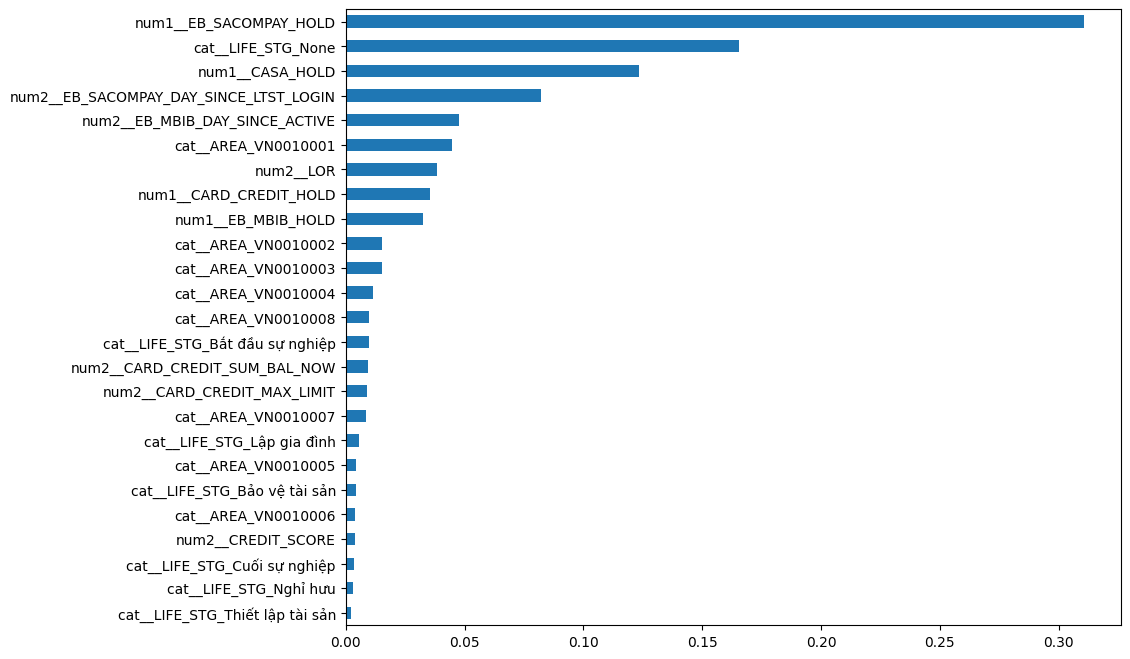

In [12]:
featimp_series = pd.Series(model[-1].feature_importances_, index=model[:-1].get_feature_names_out())
featimp_series.nlargest(40)[::-1].plot(kind='barh', figsize=(10, 8))

In [15]:
y_pred = model.predict(X)
y_prob = model.predict_proba(X)

In [43]:
from sklearn import metrics
import seaborn as sns

In [48]:
pd.Series(y_pred).value_counts(), pd.Series(y_pred).value_counts(normalize=True)

(0    7531955
 1      57044
 dtype: int64,
 0    0.992483
 1    0.007517
 dtype: float64)

<Axes: ylabel='Density'>

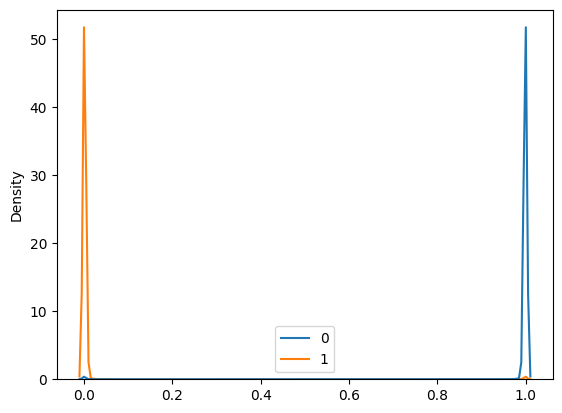

In [44]:
sns.kdeplot(y_prob)

In [20]:
p,r,f,_ = metrics.precision_recall_fscore_support(y, y_pred)
auc = metrics.roc_auc_score(y, y_prob[:,1])
gini = 2 * auc - 1
print(p,r,f)
print(auc,gini)
print(metrics.classification_report(y, y_pred))

[0.9991775  0.98984994] [0.99992307 0.9011331 ] [0.99955015 0.94341041]
0.9801699362330998 0.9603398724661996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   7526339
           1       0.99      0.90      0.94     62660

    accuracy                           1.00   7588999
   macro avg       0.99      0.95      0.97   7588999
weighted avg       1.00      1.00      1.00   7588999



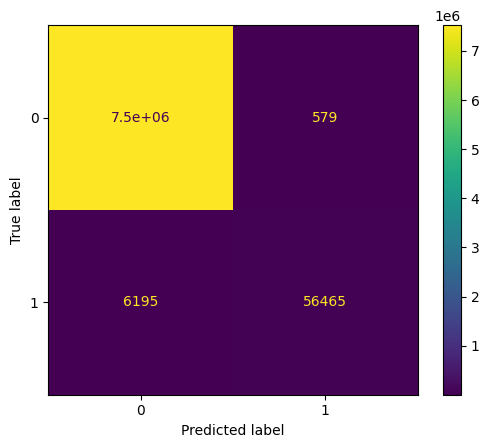

In [45]:
metrics.ConfusionMatrixDisplay.from_predictions(y, y_pred)

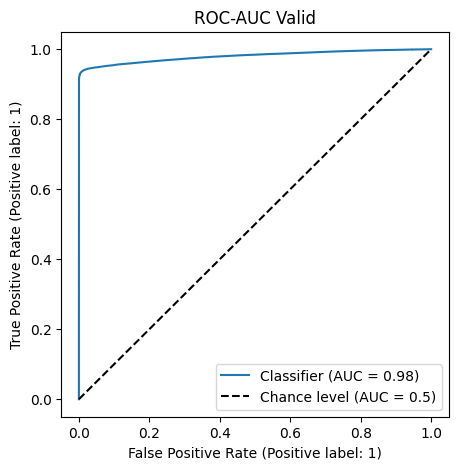

In [25]:
fig, axs = plt.subplots(1,1, figsize=(5, 5))
metrics.RocCurveDisplay.from_predictions(y, y_prob[:,1], plot_chance_level=True, ax=axs)
axs.set_title('ROC-AUC Valid')
plt.grid = True
plt.show()

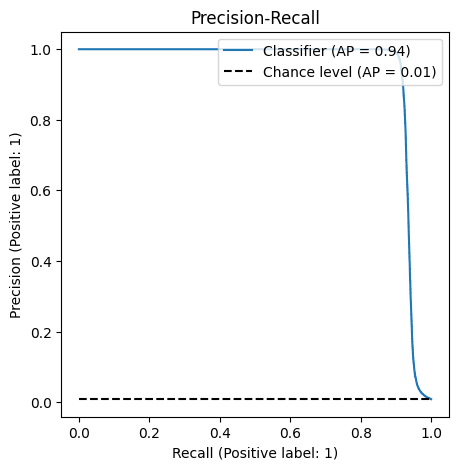

In [27]:
fig, axs = plt.subplots(1,1, figsize=(5, 5))
metrics.PrecisionRecallDisplay.from_predictions(y, y_prob[:,1], plot_chance_level=True, ax=axs)
axs.set_title('Precision-Recall')
axs.legend(loc='upper right')
plt.show()

In [32]:
def plot_precision_recall_with_thresholds(y_test, y_prob, ax):
    
    
    y_score = y_prob
    precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, y_score)
    f1 = [2 * (p * r) / (p + r) for p, r in zip(precisions, recalls)]
    max_idx = np.argmax(f1)
    df = pd.DataFrame({
        'threshold': [0] + thresholds.tolist(),
        'precision': precisions,
        'recall': recalls,
        'f1-score': f1
    })
    sns.lineplot(df.set_index('threshold'), palette='tab10', ax=ax, )
    ax.plot(thresholds[max_idx], f1[max_idx], marker='*', color='r', markersize=10)
    ax.text(thresholds[max_idx], f1[max_idx], f'({thresholds[max_idx]:.2f},{f1[max_idx]:.2f})', ha='left',va='top')

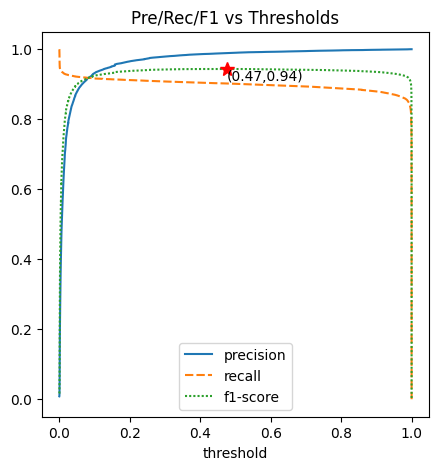

In [34]:
fig, axs = plt.subplots(1,1,figsize=(5, 5))
plot_precision_recall_with_thresholds(y, y_prob[:,1], ax=axs)
axs.set_title('Pre/Rec/F1 vs Thresholds')
plt.show()